In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('customers.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
value_counts = df['y'].value_counts()
value_counts

y
no     39922
yes     5289
Name: count, dtype: int64

In [4]:
from imblearn.over_sampling import RandomOverSampler

input_columns = df.drop('y', axis=1)  

class_column = df['y']

oversampler = RandomOverSampler(random_state=0)

input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)

df = pd.concat([input_columns_resampled, class_column_resampled], axis=1)

In [5]:
class_distribution = df['y'].value_counts()
class_distribution

y
no     39922
yes    39922
Name: count, dtype: int64

In [6]:
X = df.iloc[:,0:16].values

y = df.iloc[:,-1]

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()

y = labelencoder_y.fit_transform(y)

In [8]:
print(y)

[0 0 0 ... 1 1 1]


In [9]:
X_job = X[:,[1]]
print(np.unique(X_job))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       sparse_threshold=0)#sparse_threshold=0:to make compelete metrix have no spaces

X_job = ct.fit_transform(X_job)

print(X_job.shape)

(79844, 12)


In [11]:
print(X_job)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [12]:
X_cat = X[:,[1, 2, 3, 4, 6, 7, 8, 10, 15]]

In [13]:
X_cat.shape

(79844, 9)

In [14]:
num_of_columns = X_cat.shape[1]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), list(range(num_of_columns)))], 
                       remainder='passthrough', 
                       sparse_threshold=0)

# Apply the transformation
X_cat = ct.fit_transform(X_cat)

In [15]:
X_cat.shape

(79844, 44)

In [16]:
X_num = X[:,[0, 5, 9, 11, 12, 13, 14]]

X = np.concatenate((X_num,X_cat), axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 32, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifierHistory = classifier.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
1872/1872 [==============================] - 23s 8ms/step - loss: 0.3419 - accuracy: 0.8560 - val_loss: 0.3095 - val_accuracy: 0.8720
Epoch 2/100
1872/1872 [==============================] - 12s 6ms/step - loss: 0.2901 - accuracy: 0.8832 - val_loss: 0.2916 - val_accuracy: 0.8829
Epoch 3/100
1872/1872 [==============================] - 12s 6ms/step - loss: 0.2697 - accuracy: 0.8922 - val_loss: 0.2849 - val_accuracy: 0.8835
Epoch 4/100
1872/1872 [==============================] - 13s 7ms/step - loss: 0.2510 - accuracy: 0.9011 - val_loss: 0.2662 - val_accuracy: 0.8935
Epoch 5/100
1872/1872 [==============================] - 13s 7ms/step - loss: 0.2341 - accuracy: 0.9086 - val_loss: 0.2638 - val_accuracy: 0.8982
Epoch 6/100
1872/1872 [==============================] - 11s 6ms/step - loss: 0.2207 - accuracy: 0.9148 - val_loss: 0.2538 - val_accuracy: 0.9023
Epoch 7/100
1872/1872 [==============================] - 11s 6ms/step - loss: 0.2083 - accuracy: 0.9195 - val_loss: 0.2522 -

In [20]:
from keras.layers import Dropout

classifier = Sequential()

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dropout(0.5))

classifier.add(Dense(units = 32, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifierHistory = classifier.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test)) 

Epoch 1/100
1872/1872 [==============================] - 27s 9ms/step - loss: 0.3748 - accuracy: 0.8392 - val_loss: 0.3212 - val_accuracy: 0.8675
Epoch 2/100
 293/1872 [===>..........................] - ETA: 10s - loss: 0.3238 - accuracy: 0.8674

1872/1872 [==============================] - 11s 6ms/step - loss: 0.3162 - accuracy: 0.8716 - val_loss: 0.3032 - val_accuracy: 0.8761
Epoch 3/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2988 - accuracy: 0.8795 - val_loss: 0.2951 - val_accuracy: 0.8808
Epoch 4/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2853 - accuracy: 0.8849 - val_loss: 0.2864 - val_accuracy: 0.8858
Epoch 5/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2779 - accuracy: 0.8888 - val_loss: 0.2809 - val_accuracy: 0.8874
Epoch 6/100
1872/1872 [==============================] - 5s 3ms/step - loss: 0.2707 - accuracy: 0.8916 - val_loss: 0.2747 - val_accuracy: 0.8926
Epoch 7/100
1872/1872 [==============================] - 5s 3ms/step - loss: 0.2616 - accuracy: 0.8954 - val_loss: 0.2677 - val_accuracy: 0.8897
Epoch 8/100
1872/1872 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.8973 - val_loss: 0.2650 - val_accuracy: 0.8

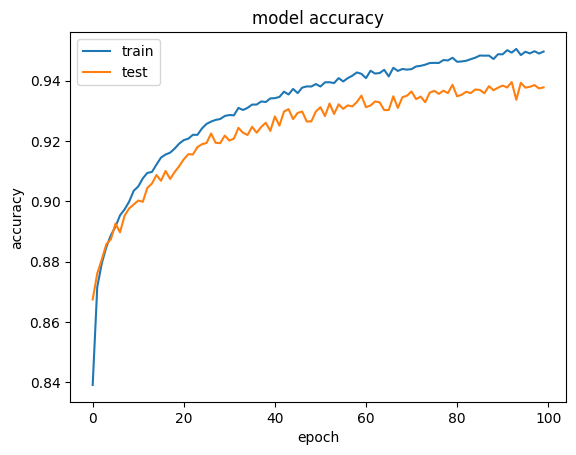

In [21]:
import matplotlib.pyplot as plt

plt.plot(classifierHistory.history['accuracy'])
plt.plot(classifierHistory.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
evaluation = classifier.evaluate(X_test, y_test)

print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

624/624 [==============================] - 1s 2ms/step - loss: 0.1995 - accuracy: 0.9378
Loss: 0.1994762420654297
Accuracy: 0.937778651714325


In [23]:
y_pred = classifier.predict(X_test)

y_pred_binary = (y_pred > 0.5)

print(y_pred_binary)

624/624 [==============================] - 1s 2ms/step
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [False]]


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", round(100*accuracy,2))


precision = precision_score(y_test, y_pred_binary)
print("Precision:", round(100*precision,2))

recall = recall_score(y_test, y_pred_binary)
print("Recall:", round(100*recall,2))

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", round(100*f1,2))

Accuracy: 93.78
Precision: 90.0
Recall: 98.63
F1 Score: 94.12
